In [32]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from models import train, test, cv, get_model

In [2]:
# Load data

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

attributes = ["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea"]
x_train = df_train[attributes]
y_train = df_train["SalePrice"]

### Correlation between the top 10 attributes and SalePrice

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


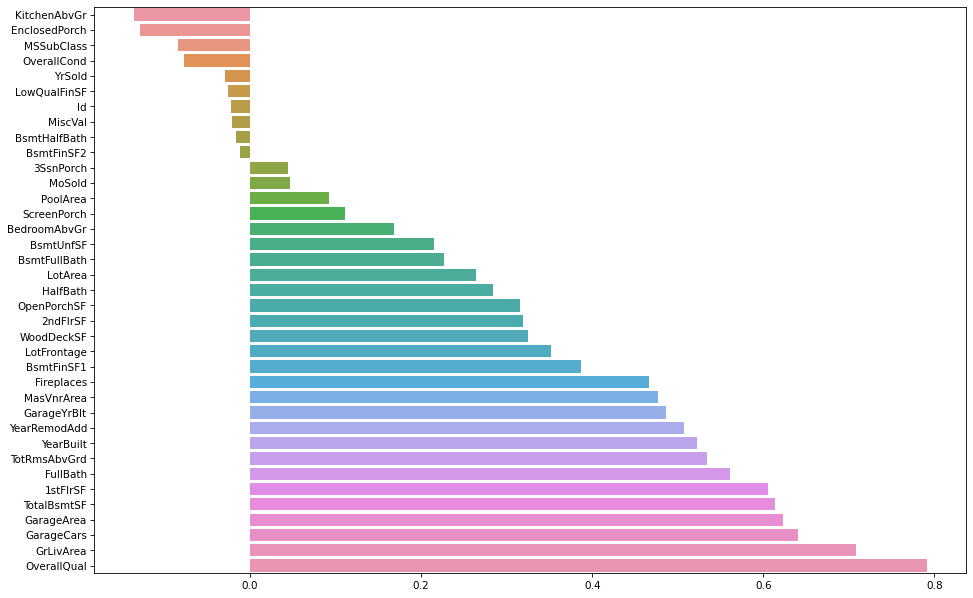

In [16]:
plt.figure(figsize=(15,10), dpi=75)
correlation_train_df = df_train.drop("SalePrice", axis=1)
correlation_sales_price = correlation_train_df.corrwith(df_train["SalePrice"]).sort_values()[:]
sns.barplot(correlation_sales_price.values, correlation_sales_price.index, orient="h")
plt.savefig("correlation.png")

In [33]:
import sklearn_relief as relief
# Load some data and put it in a numpy.array matrix
rrelieff_attrs = ["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea", "GarageArea", "GarageCars", "GarageYrBlt", "Fireplaces", "2ndFlrSF", "1stFlrSF", "OverallCond", "LotArea"]
my_input_matrix = df_train[rrelieff_attrs].fillna(0).values

# Load the label vector
my_label_vector = df_train["SalePrice"].values
r = relief.RReliefF(
    n_features=10 # Choose the best 3 features
) # Will run by default on all processors concurrently

my_transformed_matrix = r.fit_transform(
    my_input_matrix,
    my_label_vector
)

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


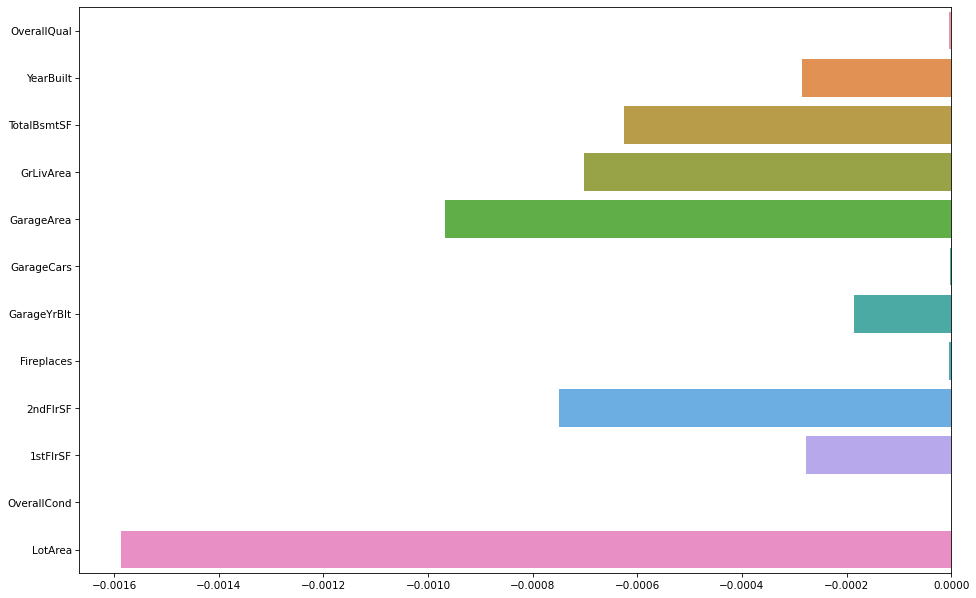

In [34]:
plt.figure(figsize=(15,10), dpi=75)
sns.barplot(r.w_, rrelieff_attrs, orient="h")
plt.savefig("rrelieff.png")

# my_transformed_matrix will now contain the 3 highest-ranked feature
# vectors from my_input_matrix.



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


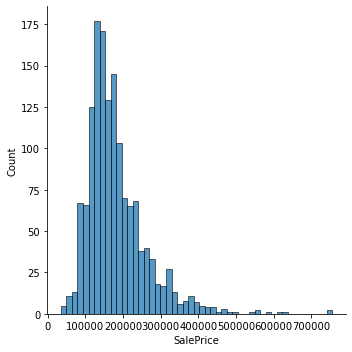

In [4]:
print(df_train["SalePrice"].describe())
sns.displot(df_train["SalePrice"])

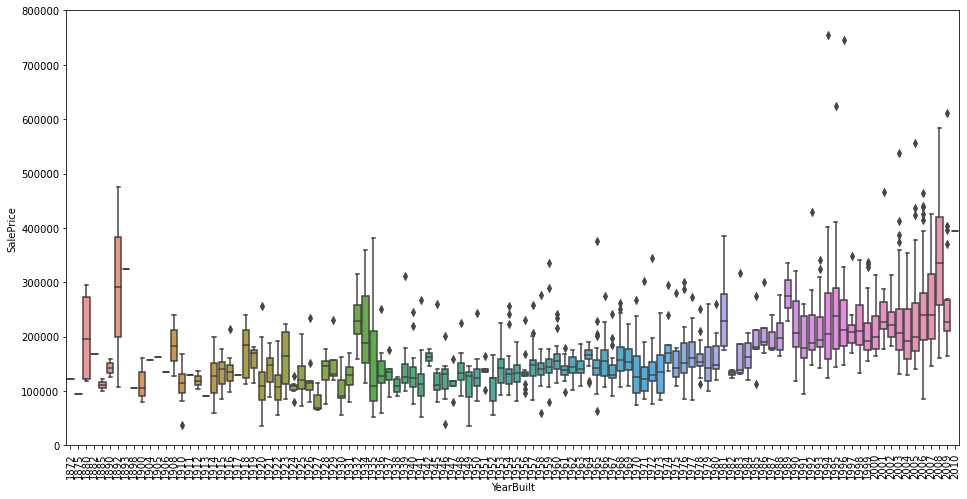

In [37]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

## Correlation matrix of the top 10 correlated attributes

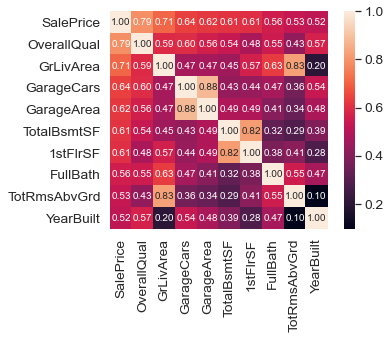

In [19]:
#saleprice correlation matrix
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalePrice
- GarageCars and GarageArea are strongly correlated to SalePrice, but also to eachother, so we keep
just on - GarageCars since it's more correlated with SalePrice
- TotalBsmtSF and 1stFlrSF are strongly correlated to eachother
- TotRmsAbvGrid and GrLivArea are also strongly correlated to eachother ( we don't want too much
multicollinearity in our data)

## Scatter plots between SalePrice and the top correlated attributes

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

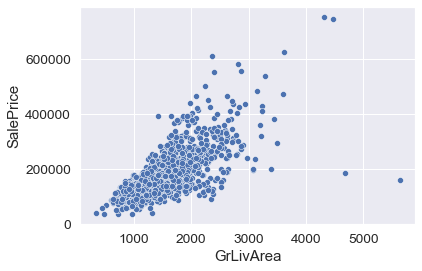

In [24]:
sns.scatterplot(df_train["GrLivArea"], df_train["SalePrice"])

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

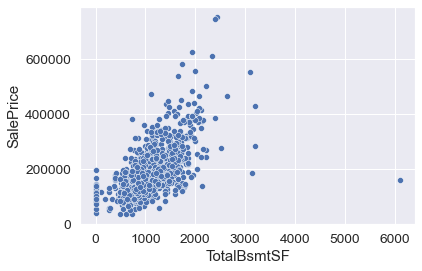

In [25]:
sns.scatterplot(df_train["TotalBsmtSF"], df_train["SalePrice"])

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

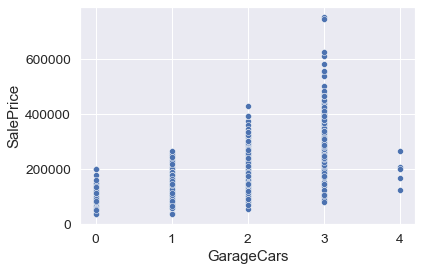

In [27]:
sns.scatterplot(df_train["GarageCars"], df_train["SalePrice"])

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


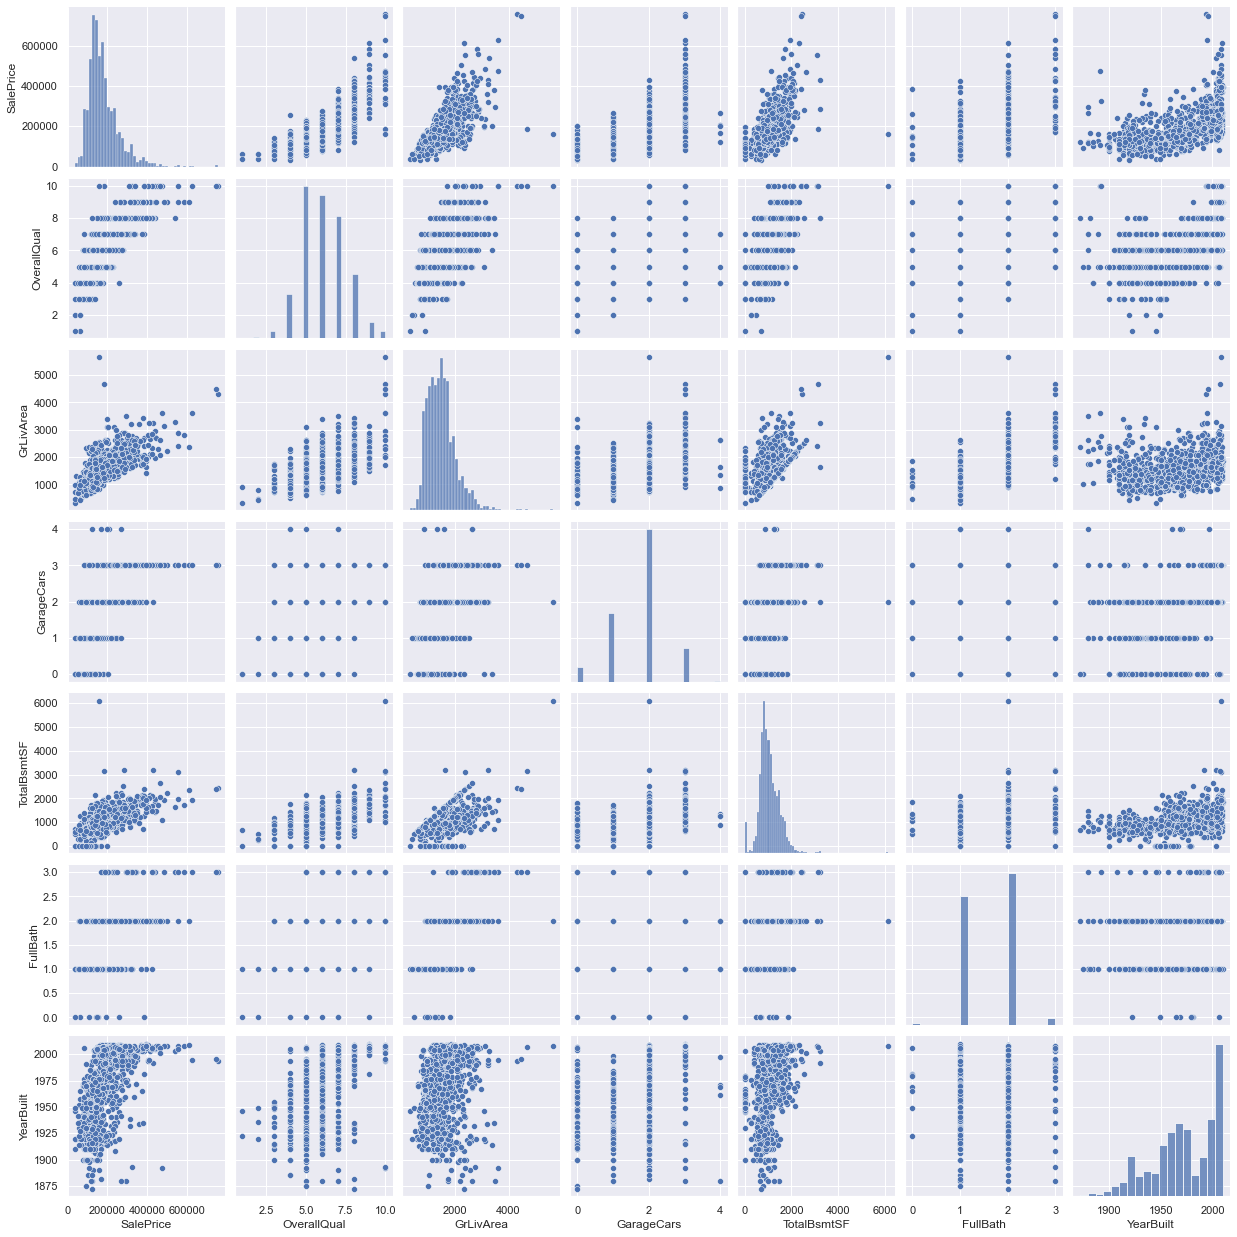

In [28]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();


In [29]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [30]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [33]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<ipython-input-33-d8fa2aa28729>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])


In [ ]:
#deleting points - serious outliers for GrLivArea -> big GrLivArea, low price, probably agricultural areas
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)


C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


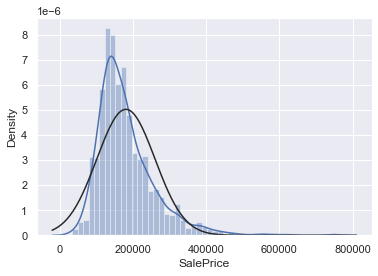

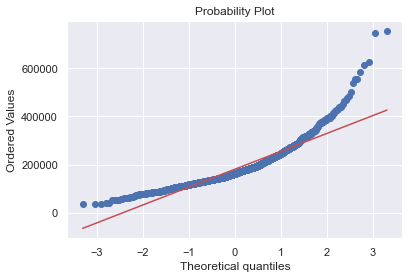

In [35]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(df_train['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

SalePrice is not normal - shows peaknedess and positive skewness.
We can change that by applying a log transformation.


C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


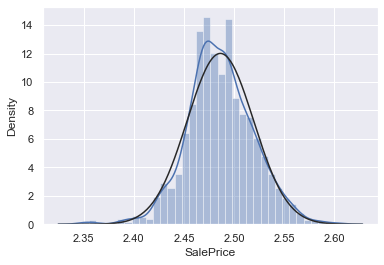

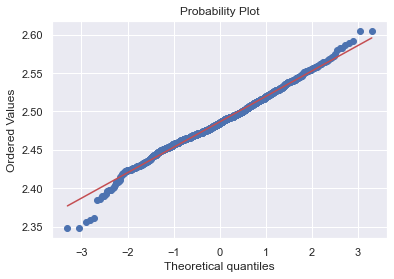

In [37]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)



C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


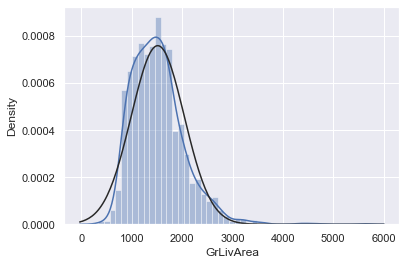

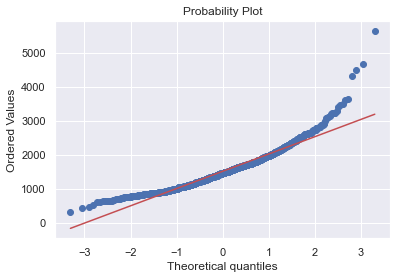

In [39]:


#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


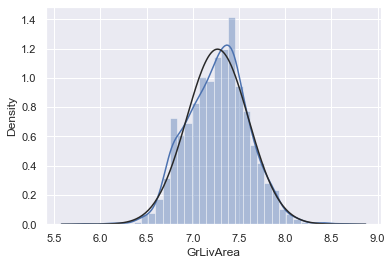

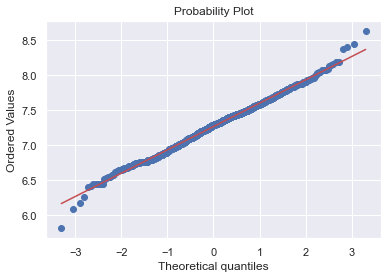

In [40]:

df_train["GrLivArea"] = np.log(df_train["GrLivArea"])
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


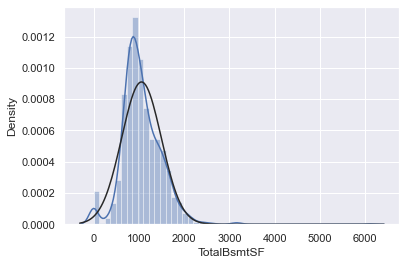

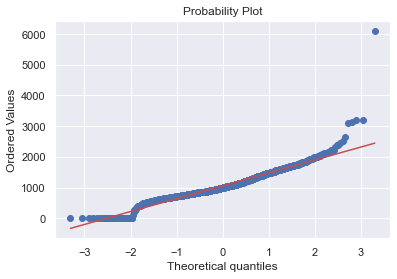

In [41]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

A lot of observations are zero, since a lot of houses don't have basements -> can't apply log transforamtion.
--> We can apply log transforamtion to non-zero values and levo zeros in order to keep the effect on the price if the house has no basement

C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Andrej\Anaconda3\envs\house-price-prediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


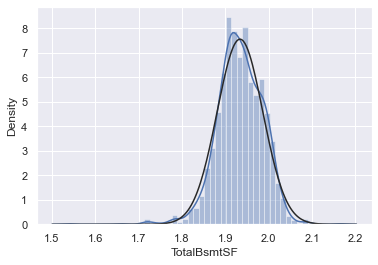

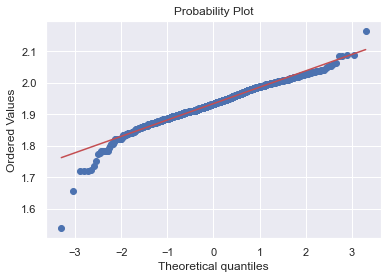

In [43]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0,'HasBsmt'] = 1

#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

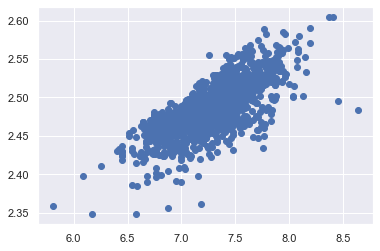

In [44]:
# Linearity is much bigger now
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

